# **NATURAL LANGUAGE PROCESSING:**
## **Project Title :** **Title Generation**
### -by
*   **Arkadipta De (AI20MTECH14002)**
*   **Venkatesh E (AI20MTECH14005)**
*   **Priya Bhatia (AI20MTECH14015)**

#### **Guide : Dr Maunendra Sankar Desarkar, Dr Srijith**


**Description:** Given the abstract of a technical paper, generate a suitable title for it

**Data Source Link :**[Arxiv Dataset](https://www.kaggle.com/neelshah18/arxivdataset)



*   Collection of 31000+ paper meta data.
*   This data contains all paper related to ML, CL, NER, AI and CV field publish between 1992 to 2018-Feb.







### **IMPORTING LIBRARIES :**


In [ ]:
# For using in Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# installations 

!pip3 install stanza 


     |████████████████████████████████| 286kB 18.1MB/s 


In [ ]:
pip install nltk

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import re 

# NLP library 
import stanza
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS


from sklearn.model_selection import train_test_split

from google.colab import files

import warnings
warnings.filterwarnings("ignore")

In [ ]:
stanza.download('en')

nltk.download('stopwords')

2021-04-11 09:08:04 INFO: Downloading default packages for language: en (English)...
2021-04-11 09:09:29 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# to display the rows and columns of dataset properly 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### **READING AND UNDERSTANDING THE DATA :**

In [ ]:
# file path for dataset 
data_path="/content/gdrive/My Drive/arxivData.json"

arxiv_data=pd.read_json(data_path)
arxiv_data.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]",2,"We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention mechanism improves\nperformance in tasks requiring sequential or relational reasoning on the VQA\ndataset.","[{'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CV', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Dual Recurrent Attention Units for Visual Question Answering,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck Dernoncourt'}]",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1603.03827v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1603.03827v1', 'type': 'application/pdf', 'title': 'pdf'}]",3,"Recent approaches based on artificial neural networks (ANNs) have shown\npromising results for short-text classification. However, many short texts\noccur in sequences (e.g., sentences in a document or utterances in a dialog),\nand most existing ANN-based systems do not leverage the preceding short texts\nwhen classifying a subsequent one. In this work, we present a model based on\nrecurrent neural networks and convolutional neural networks that incorporates\nthe preceding short texts. Our model achieves state-of-the-art results on three\ndifferent datasets for dialog act prediction.","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Sequential Short-Text Classification with Recurrent and Convolutional\n Neural Networks,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim Klinger'}, {'name': 'Gerald Tesauro'}, {'name': 'Kartik Talamadupula'}, {'name': 'Bowen Zhou'}, {'name': 'Yoshua Bengio'}, {'name': 'Aaron Courville'}]",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1606.00776v2', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1606.00776v2', 'type': 'application/pdf', 'title': 'pdf'}]",6,"We introduce the multiresolution recurrent neural network, which extends the\nsequence-to-sequence framework to model natural language generation as two\nparallel discrete stochastic processes: a sequence of high-level coarse tokens,\nand a sequence of natural language tokens. There are many ways to estimate or\nlearn the high-level coarse tokens, but we argue that a simple extraction\nprocedure is sufficient to capture a wealth of high-level discourse semantics.\nSuch procedure allows training the multiresolution recurrent neural network by\nmaximizing the exact joint log-likelihood over both sequences. In contrast to\nthe standard log- likelihood objective w.r.t

**What the dataset has ?** 

**Attributes :** 

        i) author - name of the author for the arxiv paper  
        ii) day - particular day in that month mentioned 
        iii) id - unique id for the paper in arxiv 
        iv) month - month in which paper uploaded 
        v) summary - abstract about the paper 
        vi) tag - labels which denotes under which category the arxiv seperates the paper work 
        vii) title - title of paper 
        viii) year - year in which the paper was uploaded 
        ix) link - arxiv paper link



In [ ]:
# copy the main data 
title_df=arxiv_data.copy()
print("Shape of the dataset :",title_df.shape)

Shape of the dataset : (41000, 9)


In [ ]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   41000 non-null  object
 1   day      41000 non-null  int64 
 2   id       41000 non-null  object
 3   link     41000 non-null  object
 4   month    41000 non-null  int64 
 5   summary  41000 non-null  object
 6   tag      41000 non-null  object
 7   title    41000 non-null  object
 8   year     41000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


**Note :** In this dataset, there is no such missing entires and except day,month and year all other features contains text.

### **DATA PREPROCESSING :**

##### **DROP FEATURES :**

In [ ]:
drop_features=['month','id','year','day','link','author']
title_df=title_df.drop(drop_features,axis=1)
print("Modified shape of dataset :",title_df.shape)

Modified shape of dataset : (41000, 3)


Here, we take the useful features for title generation task. 

**Features Used :** 

1. summary 
2. title 
3. tag (for classification task) 

**Features Dropped :**

1. month 
2. day 
3. year 
4. link 
5. id
6. author 

In [ ]:
title_df.head(2)

,summary,tag,title
0,"We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention mechanism improves\nperformance in tasks requiring sequential or relational reasoning on the VQA\ndataset.","[{'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CV', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Dual Recurrent Attention Units for Visual Question Answering
1,"Recent approaches based on artificial neural networks (ANNs) have shown\npromising results for short-text classification. However, many short texts\noccur in sequences (e.g., sentences in a document or utterances in a dialog),\nand most existing ANN-based systems do not leverage the preceding short texts\nwhen classifying a subsequent one. In this work, we present a model based on\nrecurrent neural networks and convolutional neural networks that incorporates\nthe preceding short texts. Our model achieves state-of-the-art results on three\ndifferent datasets for dialog act prediction.","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Sequential Short-Text Classification with Recurrent and Convolutional\n Neural Networks


##### **DATA CLEANING :**

In [ ]:
def Word_Replacer(text_list):
  """
  Input : text_list - we get list of texts from either summary or title as input 
  Returns : cleaned_text_list - this function returns the given text list in which some words will be replaced 
  """
  check=['w.r.t','1-D','2-D','3-D','4-D','5-D','n-D','e.g','i.e','A/B']
  rep=['with respect to','1D','2D','3D','4D','5D','nD','example','that is','AB']
  cleaned_text=[]
  for text in text_list:
    for c,r in zip(check,rep):
      text=text.replace(c,r)
    cleaned_text.append(text)
  return cleaned_text 

# remove numericals 
def Numericals_Remover(text_list):
  """
  Input : text_list - we get list of texts from either summary or title as input 
  Returns : cleaned_text_list - this function returns the given text list in which all numerical entries will be removed 
  """
  cleaned_text_list=[]

  for text in text_list:
    cleaned_text=""
    for x in text.split(" "):
      if x.isnumeric():
        cleaned_text=cleaned_text+""
      elif x.isspace() or not(x):
        continue 
      else:
        cleaned_text=cleaned_text+" "+x
    cleaned_text_list.append(cleaned_text)
  return cleaned_text_list

# remove punctuations 
def Punctuation_Remover(text_list):
  """
  Input : text_list - we get list of texts from either summary or title as input 
  Returns : cleaned_text_list - this function returns the given text list in which all punctuations will be removed 
  """
  punctuation_signs= '''!()-…[]{};₹:“।|”'"\,<>/?@#$%^&*+_~'''
  cleaned_text_list=[]
  for text in text_list:
    cleaned_text=""
    for x in text:
      if x in punctuation_signs:
        cleaned_text=cleaned_text+" "
      elif x not in punctuation_signs:
        cleaned_text=cleaned_text+x
    cleaned_text_list.append(cleaned_text)
  return cleaned_text_list

# remove new line symbols ("\n")
def NewLineSymbolRemover(text_list):
  """
  Input : text_list - we get list of texts from either summary or title as input 
  Returns : cleaned_text_list - this function returns the given text list in which all ("\n") will be removed 
  """
  cleaned_text_list=[]
  for text in text_list:
    new_text=re.compile("["u"\u000A" #newlines
                           "]+", flags=re.UNICODE)
    cleaned_text=new_text.sub(r' ', text)
    cleaned_text_list.append(cleaned_text)
  return cleaned_text_list

#  data cleaning block 
def DataCleaner(df):
  """
  Input : df - input dataframe
  Returns : cleaned dataframe
  """
  df['summary']=Word_Replacer(df['summary'])
  df['summary']=Punctuation_Remover(df['summary'])
  df['summary']=Numericals_Remover(df['summary'])
  df['summary']=NewLineSymbolRemover(df['summary'])
  df['title']=Punctuation_Remover(df['title'])
  df['title']=Numericals_Remover(df['title'])
  df['title']=NewLineSymbolRemover(df['title'])
  return df 


In [ ]:
title_cleaned_df=DataCleaner(title_df)
title_cleaned_df.head()

,summary,tag,title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model. We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy. In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset.,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CV', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification. However many short texts occur in sequences example. sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one. In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts. Our model achieves state of the art results on three different datasets for dialog act prediction.,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks
2,We introduce the multiresolution recurrent neural network which extends the sequence to sequence framework to model natural language generation as two parallel discrete stochastic processes a sequence of high level coarse tokens and a sequence of natural language tokens. There are many ways to estimate or learn the high level coarse tokens but we argue that a simple extraction procedure is sufficient to capture a wealth of high level discourse semantics. Such procedure allows training the multiresolution recurrent neural network by maximizing the exact joint log likelihood over both sequences. In contrast to the standard log likelihood objective with respect to. natural language tokens word perplexity optimizing the joint log likelihood biases the model towards modeling high level abstractions. We apply the proposed model to the task of dialogue response generation in two challenging domains the Ubuntu technical support domain and Twitter conversations. On Ubuntu the model outperforms competing approaches by a substantial margin achieving state of the art results according to both automatic evaluation metrics and a human evaluation study. On Twitter the model appears to generate more relevant and on topic responses according to automatic evaluation metrics. Finally our experiments demonstrate that the proposed model is more adept at overcoming the sparsity of natural language and is better able to capture long term structure.,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme'

##### **TAG EXTRACTION :**

**Method 1 :** This method will also return NULL Values for some abstract if we have the tags other than these 11 tags.

In [ ]:
# extract key term from tag 
def Extract_Class(list_dict):
  """
  Input : list_dict - input string 
  Returns : keywords target labels from input string 
  """
  tags_needed=[" 'stat.ML'", " 'cs.AI'", " 'cs.CL'", " 'cs.LG'", " 'cs.NE'"," 'cs.CV'"]
  class_labels=[]
  #print(list_dict)
  l=len(list_dict.split(","))
  #print("corresponding length ",l)
  for i in range(0,l,3):
    #print("iterate ",i)
    temp=list_dict.split(",")[i]
    #print(temp)
    pred_label=temp.split(':')[1]
    if pred_label in tags_needed:
      class_labels.append(pred_label)
    else:
      break
  #print("class labels ",class_labels)
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  out_class_labels=[]
  for labels in class_labels:
    new_labels = ""
    for char in labels:
      if char not in punctuations:
        new_labels += char
    out_class_labels.append(new_labels)
  return ",".join(out_class_labels)

# get tags for each abstract 
def DataLabeller(df):
  """
  Input - df - input dataframe 
  Retunrs - dataframe with labels 
  """
  i=0
  for list_dict in df['tag']:
    df['tag'][i]=Extract_Class(list_dict)
    i+=1 
  return df 

In [ ]:
# method 1 - classification task 
df1=title_cleaned_df.copy()
df2=title_cleaned_df.copy()

title_classifier_df=DataLabeller(df1)
title_classifier_df.head(10)

,summary,tag,title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model. We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy. In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset.,"csAI, csCL, csCV, csNE, statML",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification. However many short texts occur in sequences example. sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one. In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts. Our model achieves state of the art results on three different datasets for dialog act prediction.,"csCL, csAI, csLG, csNE, statML",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks
2,We introduce the multiresolution recurrent neural network which extends the sequence to sequence framework to model natural language generation as two parallel discrete stochastic processes a sequence of high level coarse tokens and a sequence of natural language tokens. There are many ways to estimate or learn the high level coarse tokens but we argue that a simple extraction procedure is sufficient to capture a wealth of high level discourse semantics. Such procedure allows training the multiresolution recurrent neural network by maximizing the exact joint log likelihood over both sequences. In contrast to the standard log likelihood objective with respect to. natural language tokens word perplexity optimizing the joint log likelihood biases the model towards modeling high level abstractions. We apply the proposed model to the task of dialogue response generation in two challenging domains the Ubuntu technical support domain and Twitter conversations. On Ubuntu the model outperforms competing approaches by a substantial margin achieving state of the art results according to both automatic evaluation metrics and a human evaluation study. On Twitter the model appears to generate more relevant and on topic responses according to automatic evaluation metrics. Finally our experiments demonstrate that the proposed model is more adept at overcoming the sparsity of natural language and is better able to capture long term structure.,"csCL, csAI, csLG, csNE, statML",Multiresolution Recurrent Neural Networks An Application to Dialogue Response Generation
3,Multi task learning is motivated by the observation that humans bring to bear what they know about related problems when solving new ones. Similarly deep neural networks can profit from related tasks by sharing parameters with other networks. However humans do not consciously decide to transfer knowledge between tasks. In Natural Language Processing NLP it is hard to predict if sharing will lead to improvements particularly if tasks are only loosely related. To overcome this we introduce Sluice Networks a general framework for multi task learning where trainable parameters control the amount of sharing. Our framework generalizes previous proposals in enabling sharing of all combinations of subspaces layers and skip connections. We perform experiments on three task pairs and across seven different domains using data from OntoNotes 5.0 and

**Method 2 :** Extracting tags that start with cs. only.

In [ ]:
# this function removes entire hyperlink 
def HyperLinkRemover(data):
  """
  input   : post data from tags
  returns : cleaned data with hyperlinks in the posts removed
  """
  non_hyperlink_text=[]
  for line in data:
    cleaned_text=re.sub(r"http\S+", "", line)
    non_hyperlink_text.append(cleaned_text)
  return non_hyperlink_text

# extract arxiv tags 
def ExtractArxivTags(data):
  """
  input   : post data from tags
  returns : cleaned data with only arxiv tags
  """
  tag_list=[]
  for tags in data:
    pattern='cs.(.*?),'
    class_tags=re.findall(pattern, tags, flags=re.IGNORECASE)
    tag_list.append(class_tags)
  return tag_list

# tag seperator 
def TagSeperator(data):
  """
  input   : uncleaned tags
  returns : cleaned data with only arxiv tags
  """
  final_list=[]
  for tags in data: 
    tags_list=list(tags.split("'"))
    k=len(tags_list)
    final_list.append(tags_list[:k-1])
  return final_list 

# TAG cleaner 
def TagsCleaner(df):
  """
  Input : df - input dataframe
  Returns : cleaned dataframe
  """
  df['tag']=HyperLinkRemover(df['tag'])
  df['tag']=ExtractArxivTags(df['tag'])
  df['tag']=Punctuation_Remover(df['tag'])
  df['tag']=TagSeperator(df['tag'])
  return df 

In [ ]:
# method 2 
title_cleaned_class_df=TagsCleaner(df2)
title_cleaned_class_df.head(10)

,summary,tag,title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model. We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy. In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset.,"[AI, CL, CV, NE]",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification. However many short texts occur in sequences example. sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one. In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts. Our model achieves state of the art results on three different datasets for dialog act prediction.,"[CL, AI, LG, NE]",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks
2,We introduce the multiresolution recurrent neural network which extends the sequence to sequence framework to model natural language generation as two parallel discrete stochastic processes a sequence of high level coarse tokens and a sequence of natural language tokens. There are many ways to estimate or learn the high level coarse tokens but we argue that a simple extraction procedure is sufficient to capture a wealth of high level discourse semantics. Such procedure allows training the multiresolution recurrent neural network by maximizing the exact joint log likelihood over both sequences. In contrast to the standard log likelihood objective with respect to. natural language tokens word perplexity optimizing the joint log likelihood biases the model towards modeling high level abstractions. We apply the proposed model to the task of dialogue response generation in two challenging domains the Ubuntu technical support domain and Twitter conversations. On Ubuntu the model outperforms competing approaches by a substantial margin achieving state of the art results according to both automatic evaluation metrics and a human evaluation study. On Twitter the model appears to generate more relevant and on topic responses according to automatic evaluation metrics. Finally our experiments demonstrate that the proposed model is more adept at overcoming the sparsity of natural language and is better able to capture long term structure.,"[CL, AI, LG, NE]",Multiresolution Recurrent Neural Networks An Application to Dialogue Response Generation
3,Multi task learning is motivated by the observation that humans bring to bear what they know about related problems when solving new ones. Similarly deep neural networks can profit from related tasks by sharing parameters with other networks. However humans do not consciously decide to transfer knowledge between tasks. In Natural Language Processing NLP it is hard to predict if sharing will lead to improvements particularly if tasks are only loosely related. To overcome this we introduce Sluice Networks a general framework for multi task learning where trainable parameters control the amount of sharing. Our framework generalizes previous proposals in enabling sharing of all combinations of subspaces layers and skip connections. We perform experiments on three task pairs and across seven different domains using data from OntoNotes 5.0 and achieve up to average error reductions ov

In [ ]:
# converting lists to strings in tags field 
def get_tags_only(data):
  """
  Input : get list of tags 
  Return : Only tags without lists 
  """ 
  labels_needed=['AI','CV','NE','LG','CL']
  out_lab=[]
  for x in data: 
    if x in labels_needed:
      out_lab.append(x)
  return ",".join(out_lab)

for i in range(len(title_cleaned_class_df['tag'])):
  title_cleaned_class_df['tag'][i]=get_tags_only(title_cleaned_class_df['tag'][i])


In [ ]:
title_cleaned_class_df.columns=['Abstract','Domain_Labels','Title']
# Dataset for title generation task 
title_gen_df=title_cleaned_class_df.copy()
title_gen_df.head()

,Abstract,Domain_Labels,Title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model. We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy. In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset.,"AI,CL,CV,NE",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification. However many short texts occur in sequences example. sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one. In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts. Our model achieves state of the art results on three different datasets for dialog act prediction.,"CL,AI,LG,NE",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks
2,We introduce the multiresolution recurrent neural network which extends the sequence to sequence framework to model natural language generation as two parallel discrete stochastic processes a sequence of high level coarse tokens and a sequence of natural language tokens. There are many ways to estimate or learn the high level coarse tokens but we argue that a simple extraction procedure is sufficient to capture a wealth of high level discourse semantics. Such procedure allows training the multiresolution recurrent neural network by maximizing the exact joint log likelihood over both sequences. In contrast to the standard log likelihood objective with respect to. natural language tokens word perplexity optimizing the joint log likelihood biases the model towards modeling high level abstractions. We apply the proposed model to the task of dialogue response generation in two challenging domains the Ubuntu technical support domain and Twitter conversations. On Ubuntu the model outperforms competing approaches by a substantial margin achieving state of the art results according to both automatic evaluation metrics and a human evaluation study. On Twitter the model appears to generate more relevant and on topic responses according to automatic evaluation metrics. Finally our experiments demonstrate that the proposed model is more adept at overcoming the sparsity of natural language and is better able to capture long term structure.,"CL,AI,LG,NE",Multiresolution Recurrent Neural Networks An Application to Dialogue Response Generation
3,Multi task learning is motivated by the observation that humans bring to bear what they know about related problems when solving new ones. Similarly deep neural networks can profit from related tasks by sharing parameters with other networks. However humans do not consciously decide to transfer knowledge between tasks. In Natural Language Processing NLP it is hard to predict if sharing will lead to improvements particularly if tasks are only loosely related. To overcome this we introduce Sluice Networks a general framework for multi task learning where trainable parameters control the amount of sharing. Our framework generalizes previous proposals in enabling sharing of all combinations of subspaces layers and skip connections. We perform experiments on three task pairs and across seven different domains using data from OntoNotes 5.0 and achieve up to average error reductions over c

In [ ]:
title_classifier_df.columns=['Abstract','Domain_Labels','Title']
title_classifier_df.head(2)

,Abstract,Domain_Labels,Title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model. We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy. In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset.,"csAI, csCL, csCV, csNE, statML",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification. However many short texts occur in sequences example. sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one. In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts. Our model achieves state of the art results on three different datasets for dialog act prediction.,"csCL, csAI, csLG, csNE, statML",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks


In [ ]:
title_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Abstract       41000 non-null  object
 1   Domain_Labels  41000 non-null  object
 2   Title          41000 non-null  object
dtypes: object(3)
memory usage: 961.1+ KB


In [ ]:
title_classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Abstract       41000 non-null  object
 1   Domain_Labels  41000 non-null  object
 2   Title          41000 non-null  object
dtypes: object(3)
memory usage: 961.1+ KB


In [ ]:
title_gen_df['Domain_Labels'].value_counts()

CV                10758
LG                7669 
AI                6481 
CL                4946 
NE                2060 
                  1769 
CV,LG             1105 
AI,LG             1095 
LG,AI             1002 
LG,CV             505  
LG,NE             369  
CV,AI             340  
CL,LG             318  
CV,LG,NE          226  
CL,AI             142  
CV,AI,LG          137  
AI,CL             135  
AI,CV             133  
NE,LG             129  
CL,LG,NE          129  
CL,AI,LG          112  
LG,AI,CV          103  
LG,CL             98   
LG,CV,NE          85   
AI,LG,NE          81   
LG,AI,NE          79   
AI,NE             67   
NE,AI             66   
CL,NE             66   
AI,CV,LG          60   
CL,AI,NE          49   
NE,CV,LG          49   
NE,AI,LG          48   
CV,NE             46   
AI,CL,LG          44   
CV,CL,LG          36   
CV,AI,CL          32   
CL,AI,LG,NE       32   
LG,CL,NE          31   
CV,AI,NE          31   
LG,AI,CL          26   
LG,AI,CV,NE     

##### **EXPLORATORY DATA ANALYSIS :**

**1. Named Entity Recognizer :**

In [ ]:
# named entity recognition 
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')
#doc = nlp("We present MILABOT a deep reinforcement learning chatbot developed by theMontreal Institute for Learning Algorithms MILA for the Amazon Alexa Prizecompetition MILABOT is capable of conversing with humans on popular small talktopics through both speech and text The system consists of an ensemble ofnatural language generation and retrieval models including template basedmodels bag of words models sequence to sequence neural network and latentvariable neural network models By applying reinforcement learning tocrowdsourced data and real world user interactions the system has been trainedto select an appropriate response from the models in its ensemble The systemhas been evaluated through A B testing with real world users where itperformed significantly better than many competing systems Due to its machinelearning architecture the system is likely to improve with additional data")
#print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

2021-04-11 09:10:10 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2021-04-11 09:10:10 INFO: Use device: cpu
2021-04-11 09:10:10 INFO: Loading: tokenize
2021-04-11 09:10:10 INFO: Loading: ner
2021-04-11 09:10:10 INFO: Done loading processors!


In [ ]:
def Abstract_Named_Entity_Recognizer(data_list):
  """
  Input : List of all abstracts 
  Returns : Named Entities along with count 
  """
  named_entities_dict={}
  for abstract in data_list:
    doc=nlp(abstract)
    for ent in doc.ents:
      word=ent.text
      if ent.type in ['CARDINAL','ORDINAL']:
        continue 
      if word in named_entities_dict:
        named_entities_dict[word]+=1 
      else:
        named_entities_dict[word]=1 
  return named_entities_dict 

# creates a bar plot where named entity along xaxis and frequency along y axis
def ner_plot(df):
  """
  input : df - dataframe 
  plots : bar plot (named entities vs frequency)
  """
  plt.figure(figsize=(20,6))
  ax1=sns.barplot(x="Words",y="Frequency",data=df,palette="OrRd_r")
  for tick in ax1.get_xticklabels():
    tick.set_rotation(45) 
    tick.set_fontsize(10)  
    #tick.set_fontweight('bold')
  plt.xlabel("Words",fontsize=25)
  plt.ylabel("Frequency",fontsize=25)
  #ax1.set_yticks([])
  return 

def GenerateDataAndPlots(my_dict,filename):
  """
  Input : dicti - key, value - words and its count 
          filename- name of saved file
  Plots and downloads the dataset in excel 
  """
  key_list=[]
  value_list=[]
  for k,v in my_dict.items():
    key_list.append(k)
    value_list.append(v)
  df=pd.DataFrame()
  df["Words"]=key_list
  df["Frequency"]=value_list
  top_words=df.sort_values(by="Frequency",ascending=False)
  ner_plot(top_words.head(10))
  top_words.to_excel(filename) 
  files.download(filename)
  return top_words

In [ ]:
#named_entities=Abstract_Named_Entity_Recognizer(title_gen_df['Abstract'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

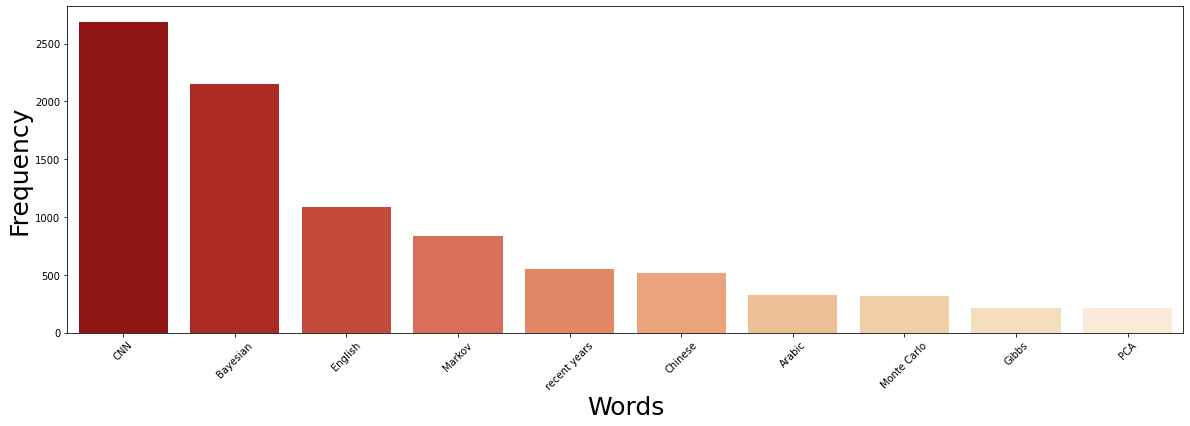

In [ ]:
#named_entities_count_df=GenerateDataAndPlots(named_entities,"Named Entities Top Words.xlsx")

**2. Frequent Word Counter :**

In [ ]:
stopwords_list=stopwords.words("english")

def Get_Words_Count(data_list,stopwords_list,named_entities):
  """
  Input : data_list - abstract list 
          stopwords_list - list of stopwords in English 
          named_entities - dictionary contains the named entities along with count 
  Returns : words along with its count in a dictionary 
  """
  words_dicti={}
  for abstract in data_list:
    for words in abstract.split(" "):
      words=words.lower()
      if (words.isspace()) or (not words):
        continue
      if len(words)<2:
        continue 
      if words.isdigit():
        continue 
      if (words not in stopwords_list) and (words not in named_entities):
        if words not in words_dicti:
          words_dicti[words]=1 
        else:
          words_dicti[words]+=1 
  return words_dicti


In [ ]:
#total_words=Get_Words_Count(title_gen_df['Abstract'],stopwords_list,named_entities)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

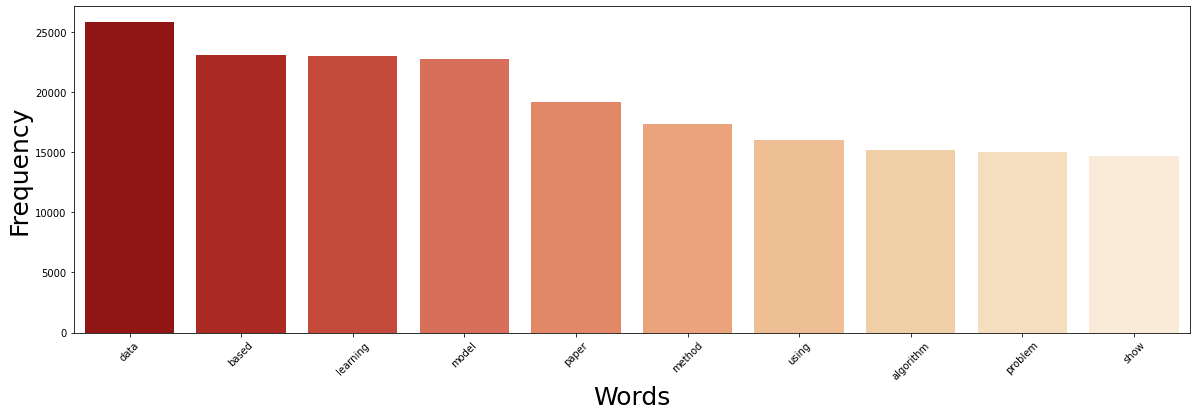

In [ ]:
#word_count_df=GenerateDataAndPlots(total_words,"Most Frequent Words.xlsx")

**Average length of words in Abstract:** 

In [ ]:
def GetAverageLength(data_list,stopwords_list,stopwords=0):
  """
  Input : data_list - list of abstracts 
          stopwords_list- list of stopwords in English
          stopwords=0 - default dont consider; else consider stop words 
  Returns : average length 
  """
  n=len(data_list)
  word_count=0
  for abstract in data_list:
    for words in abstract.split(" "):
      if (words.isspace()) or (not words):
        continue
      if stopwords!=0:
        if (words in stopwords_list):
          continue 
      word_count+=1 
  average_length=word_count//n 
  return average_length 
      
def MaxLen(data_list):
  """
  Input : data_list - list of abstracts / titles 
  Returns : max length 
  """
  n=len(data_list)
  max_len=0
  for abstract in data_list:
    word_count=0
    for words in abstract.split(" "):
      if (words.isspace()) or (not words):
        continue
      word_count+=1 
    max_len=max(max_len,word_count)
  return max_len

In [ ]:
average_length_with_Stopwords=GetAverageLength(title_gen_df['Abstract'],stopwords_list)
average_length_without_Stopwords=GetAverageLength(title_gen_df['Abstract'],stopwords_list,1)
print("Average length with and without stopwords : ",average_length_with_Stopwords,average_length_without_Stopwords)

Average length with and without stopwords :  154 100


In [ ]:
max_length_abs = MaxLen(title_gen_df['Abstract'])
max_length_tit = MaxLen(title_gen_df['Title'])
print("Maximum length of Abstract and Title  : ",max_length_abs,max_length_tit)

Maximum length of Abstract and Title  :  559 37


**4. WordCloud Representation :**

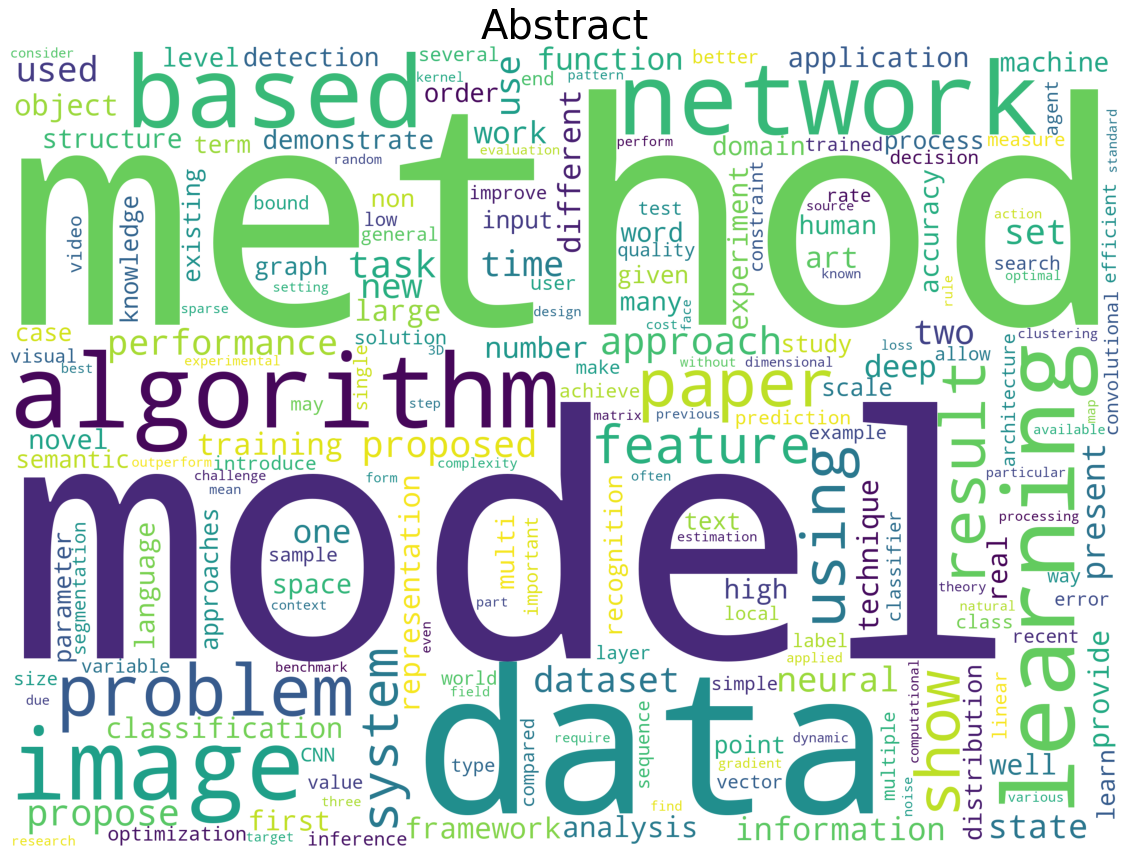

In [ ]:
plt.figure(figsize=(20,15))

text = title_gen_df.Abstract.values
word_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Abstract",fontsize=40)
plt.imshow(word_cloud)

5. **Tags Classification :**




In [ ]:
def TagsClassifierPlot(data_list):
  """
  Input : data_list - list of tags 
  Returns : dictionary with key as tags and corresponding counts 
  """
  tags_dict={}
  for tags in data_list:
    for tag in tags.split(","):
      if tag=='':
        continue
      if tag not in tags_dict:
        tags_dict[tag]=1 
      else:
        tags_dict[tag]+=1 
  return tags_dict 

def MultiLabelClassPlot(data_list):
  """
  Input : data_list - list of tags 
  Returns : dictionary with key as number of tags and corresponding counts 
  """
  count_dict={}
  for tags in data_list:
    x=len(tags.split(","))
    if x not in count_dict:
      count_dict[x]=1 
    else:
      count_dict[x]+=1 
  return count_dict 

In [ ]:
tags_dict=TagsClassifierPlot(title_gen_df['Domain_Labels'])

In [ ]:
print(tags_dict)

{'AI': 10481, 'CL': 6417, 'CV': 13902, 'NE': 3819, 'LG': 13735}


In [ ]:
count_multi=MultiLabelClassPlot(title_gen_df['Domain_Labels'])

In [ ]:
print(count_multi)

{4: 156, 5: 3, 3: 1485, 2: 5673, 1: 33683}


**NOTE :** Here we consider the tags such as **AI,CL,CV,NE,LG** as main tags for multi-label multi-class classification task.

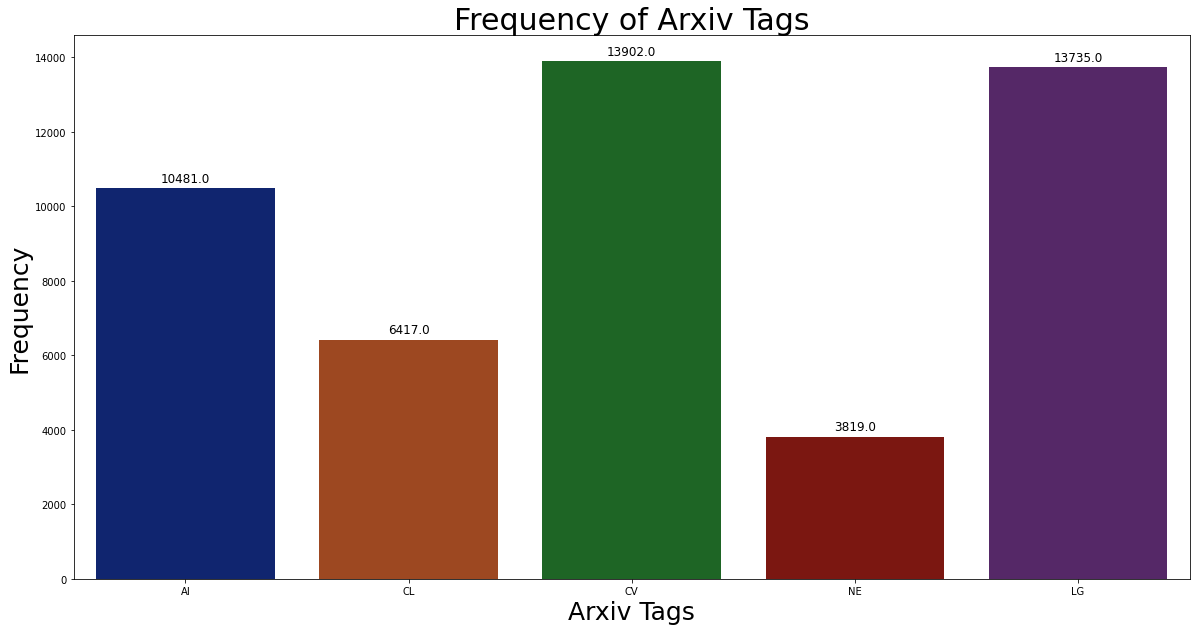

In [ ]:
plt.figure(figsize=(20,10))
keys = list(tags_dict.keys())
vals = [tags_dict[k] for k in keys]
s=sns.barplot(x=keys, y=vals,palette='dark')
for p in s.patches:
  s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
plt.xlabel("Arxiv Tags",fontsize=25)
plt.ylabel("Frequency",fontsize=25)
plt.title("Frequency of Arxiv Tags",fontsize=30)
plt.show()

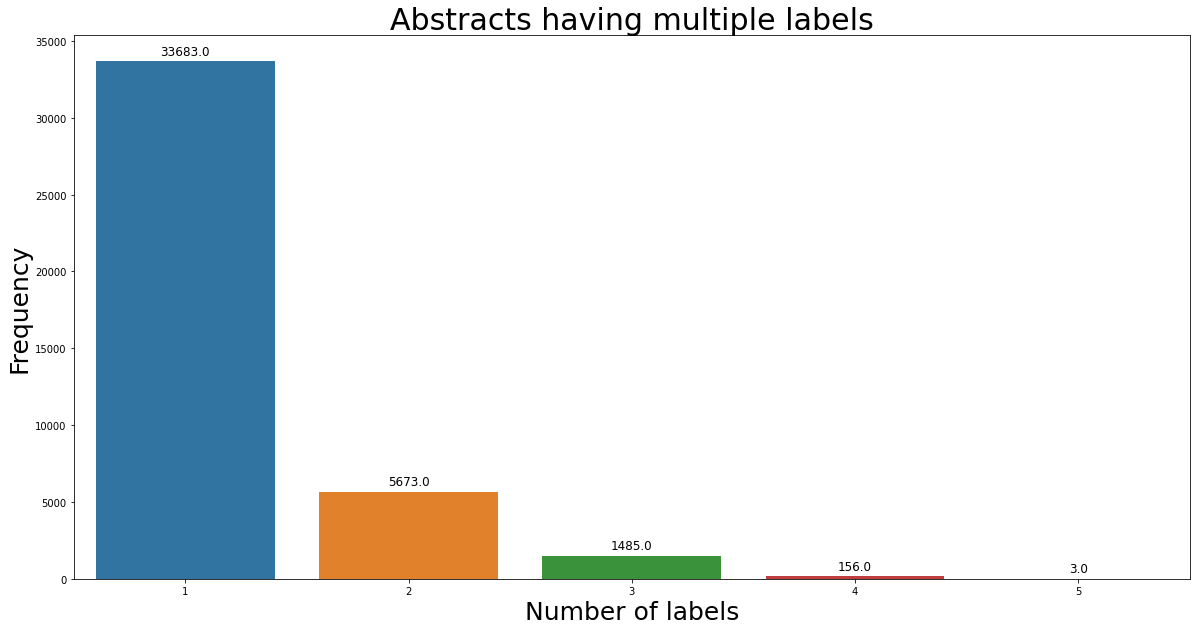

In [ ]:
plt.figure(figsize=(20,10))
keys = list(count_multi.keys())
vals = [count_multi[k] for k in keys]
s=sns.barplot(x=keys, y=vals)
for p in s.patches:
  s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
plt.xlabel("Number of labels",fontsize=25)
plt.ylabel("Frequency",fontsize=25)
plt.title("Abstracts having multiple labels",fontsize=30)
plt.show()

##### **TRAIN_VALIDATION_TEST SPLIT :**

In [ ]:
shuffled_gen=title_gen_df.sample(frac=1,random_state=42)

X=shuffled_gen 
n=X.shape[0]

X_t=X.head(int(0.8*n))
test=X.tail(int(0.2*n))

k=X_t.shape[0]

train=X_t.head(int(0.8*k))
val=X_t.tail(int(0.2*k))

print("train shape : ",train.shape)
print("validation shape : ",val.shape)
print("test shape : ",test.shape)

train shape :  (26240, 3)
validation shape :  (6560, 3)
test shape :  (8200, 3)


In [ ]:
# get x and y for train , test and val 
def Get_XY(train,validation,test,out="Title"):
  """
  Input : train, validation , test 
          out - "Title" as ylabel by default 
  Returns : X_train, X_test, X_val, y_train, y_val,y_test 
  """
  X_train=train['Abstract']
  X_test=validation['Abstract']
  X_val= validation['Abstract']

  y_train = train[out]
  y_test= test[out]
  y_val= validation[out]
  
  return X_train,y_train,X_val,y_val,X_test,y_test

### **DATA STORING :**

In [ ]:
# SAVING DATASETS 

def Dataset_Saver(df,filename):
  df.to_excel(filename,index=False) 
  files.download(filename)



In [ ]:
arxiv_data.head(20)

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]",2,"We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention mechanism improves\nperformance in tasks requiring sequential or relational reasoning on the VQA\ndataset.","[{'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CV', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Dual Recurrent Attention Units for Visual Question Answering,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck Dernoncourt'}]",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1603.03827v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1603.03827v1', 'type': 'application/pdf', 'title': 'pdf'}]",3,"Recent approaches based on artificial neural networks (ANNs) have shown\npromising results for short-text classification. However, many short texts\noccur in sequences (e.g., sentences in a document or utterances in a dialog),\nand most existing ANN-based systems do not leverage the preceding short texts\nwhen classifying a subsequent one. In this work, we present a model based on\nrecurrent neural networks and convolutional neural networks that incorporates\nthe preceding short texts. Our model achieves state-of-the-art results on three\ndifferent datasets for dialog act prediction.","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.NE', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}]",Sequential Short-Text Classification with Recurrent and Convolutional\n Neural Networks,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim Klinger'}, {'name': 'Gerald Tesauro'}, {'name': 'Kartik Talamadupula'}, {'name': 'Bowen Zhou'}, {'name': 'Yoshua Bengio'}, {'name': 'Aaron Courville'}]",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1606.00776v2', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1606.00776v2', 'type': 'application/pdf', 'title': 'pdf'}]",6,"We introduce the multiresolution recurrent neural network, which extends the\nsequence-to-sequence framework to model natural language generation as two\nparallel discrete stochastic processes: a sequence of high-level coarse tokens,\nand a sequence of natural language tokens. There are many ways to estimate or\nlearn the high-level coarse tokens, but we argue that a simple extraction\nprocedure is sufficient to capture a wealth of high-level discourse semantics.\nSuch procedure allows training the multiresolution recurrent neural network by\nmaximizing the exact joint log-likelihood over both sequences. In contrast to\nthe standard log- likelihood objective w.r.t

In [ ]:
title_gen_df.head(20)

,Abstract,Domain_Labels,Title
0,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question Our single model outperforms the first place winner on the VQA dataset performs within margin to the current state of the art ensemble model We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy In both cases our recurrent attention mechanism improves performance in tasks requiring sequential or relational reasoning on the VQA dataset,"AI,CL,CV,NE",Dual Recurrent Attention Units for Visual Question Answering
1,Recent approaches based on artificial neural networks ANNs have shown promising results for short text classification However many short texts occur in sequences example sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts Our model achieves state of the art results on three different datasets for dialog act prediction,"CL,AI,LG,NE",Sequential Short Text Classification with Recurrent and Convolutional Neural Networks
2,We introduce the multiresolution recurrent neural network which extends the sequence to sequence framework to model natural language generation as two parallel discrete stochastic processes a sequence of high level coarse tokens and a sequence of natural language tokens There are many ways to estimate or learn the high level coarse tokens but we argue that a simple extraction procedure is sufficient to capture a wealth of high level discourse semantics Such procedure allows training the multiresolution recurrent neural network by maximizing the exact joint log likelihood over both sequences In contrast to the standard log likelihood objective with respect to natural language tokens word perplexity optimizing the joint log likelihood biases the model towards modeling high level abstractions We apply the proposed model to the task of dialogue response generation in two challenging domains the Ubuntu technical support domain and Twitter conversations On Ubuntu the model outperforms competing approaches by a substantial margin achieving state of the art results according to both automatic evaluation metrics and a human evaluation study On Twitter the model appears to generate more relevant and on topic responses according to automatic evaluation metrics Finally our experiments demonstrate that the proposed model is more adept at overcoming the sparsity of natural language and is better able to capture long term structure,"CL,AI,LG,NE",Multiresolution Recurrent Neural Networks An Application to Dialogue Response Generation
3,Multi task learning is motivated by the observation that humans bring to bear what they know about related problems when solving new ones Similarly deep neural networks can profit from related tasks by sharing parameters with other networks However humans do not consciously decide to transfer knowledge between tasks In Natural Language Processing NLP it is hard to predict if sharing will lead to improvements particularly if tasks are only loosely related To overcome this we introduce Sluice Networks a general framework for multi task learning where trainable parameters control the amount of sharing Our framework generalizes previous proposals in enabling sharing of all combinations of subspaces layers and skip connections We perform experiments on three task pairs and across seven different domains using data from OntoNotes and achieve up to average error reductions over common approaches to multi task le

In [ ]:
# first cut cleaned dataset 
Dataset_Saver(title_gen_df,"Title_Generation_df_FullStop.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_gen,y_train_gen,X_val_gen,y_val_gen,X_test_gen,y_test_gen=Get_XY(train,val,test)

In [ ]:
# train_val_test for title generation task 
Dataset_Saver(X_train_gen,"X_train_Title_Generation.xlsx")
Dataset_Saver(X_val_gen,"X_val_Title_Generation.xlsx")
Dataset_Saver(X_test_gen,"X_test_Title_Generation.xlsx")

Dataset_Saver(y_train_gen,"y_train_Title_Generation.xlsx")
Dataset_Saver(y_val_gen,"y_val_Title_Generation.xlsx")
Dataset_Saver(y_test_gen,"y_test_Title_Generation.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_tag,y_train_tag,X_val_tag,y_val_tag,X_test_tag,y_test_tag=Get_XY(train,val,test,out="Domain_Labels")

In [ ]:
# train_val_test for tags classification task 
Dataset_Saver(X_train_tag,"X_train_Tags_Classification.xlsx")
Dataset_Saver(X_val_tag,"X_val_Tags_Classification.xlsx")
Dataset_Saver(X_test_tag,"X_test_Tags_Classification.xlsx")

Dataset_Saver(y_train_tag,"y_train_Tags_Classification.xlsx")
Dataset_Saver(y_val_tag,"y_val_Tags_Classification.xlsx")
Dataset_Saver(y_test_tag,"y_test_Tags_Classification.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>